In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## SMD with Bhats approach

In [32]:
real_data = pd.read_csv("data/real_data_bhat_df")
fake_data = pd.read_csv("data/fake_data_bhat_df")

In [35]:
real_data

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,id
0,0.296331,0.515293,0.050096,0.621925,0.006347,0.004862,0.190134,0.243162,0.321699,0.366093,...,0.343690,0.390861,0.062697,0.851682,0.231658,0.199008,0.120383,0.796966,0.058073,0
1,0.540126,0.551777,0.000000,0.924647,0.016940,0.011366,0.017829,0.456352,0.046174,0.576041,...,0.502148,0.272841,0.113178,0.881374,0.228809,0.186013,0.124087,0.587403,0.073777,0
2,0.552214,0.315799,0.000000,0.970710,0.029314,0.017458,0.000000,0.204184,0.001003,0.669941,...,0.562840,0.478104,0.092523,0.913287,0.189142,0.142884,0.090084,0.186466,0.034014,0
3,0.448388,0.583123,0.053893,0.992766,0.003028,0.001803,0.026769,0.780457,0.022264,0.509249,...,0.449364,0.594684,0.166041,0.813858,0.191298,0.148557,0.147051,0.574376,0.082101,0
4,0.279334,0.277105,0.177749,1.000000,0.003807,0.002341,0.078839,0.734018,0.032503,0.396339,...,0.435818,0.108852,0.078465,1.000000,0.085420,0.054792,0.019387,1.000000,0.018934,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51195,0.381246,0.526399,0.141925,0.782847,0.157700,0.095421,0.182185,0.351613,0.484521,0.273384,...,0.695961,0.807899,0.431382,0.928635,0.275833,0.122113,0.384986,0.422386,0.372145,0
51196,0.815836,0.810213,0.646618,0.939406,0.456189,0.327334,0.368123,0.752793,0.337996,0.417362,...,0.607857,0.636943,0.289084,0.697548,0.444645,0.310668,0.278194,0.438013,0.169311,0
51197,0.550749,0.548674,0.605907,0.366989,0.485033,0.369318,0.691441,0.430619,0.477039,0.532176,...,0.719926,0.686228,0.583075,0.882925,0.472663,0.334536,0.394716,0.674601,0.007493,0
51198,0.343444,0.387310,0.178738,0.430738,0.172191,0.082141,0.383339,0.485986,0.633121,0.468585,...,0.575920,0.558086,0.279282,0.802984,0.153371,0.082314,0.139779,0.399390,0.199270,0


In [39]:
scores = []
for i in range(real_data.shape[1]-1):
    numerator = real_data[str(i)].mean() - fake_data[str(i)].mean()
    denominator = np.sqrt(((real_data[str(i)].var() + fake_data[str(i)].var())/2))
    #denominator = real_data[fo].std() + fake_data[fo].std()
    score = np.abs(numerator/denominator)
    print("feature: {} has a smd score of: {}".format(i,score))
    scores.append(score)

feature: 0 has a smd score of: 0.7104549413086925
feature: 1 has a smd score of: 0.7084176311824366
feature: 2 has a smd score of: 0.49837397329334704
feature: 3 has a smd score of: 0.9465459700811557
feature: 4 has a smd score of: 0.44540429462815634
feature: 5 has a smd score of: 0.19931505227770097
feature: 6 has a smd score of: 0.37108920389838546
feature: 7 has a smd score of: 0.11464421371758952
feature: 8 has a smd score of: 0.26520746528823935
feature: 9 has a smd score of: 0.17214395414640438
feature: 10 has a smd score of: 0.28177854965626586
feature: 11 has a smd score of: 0.34626876274571555
feature: 12 has a smd score of: 0.29955776834181724
feature: 13 has a smd score of: 0.6984531944516804
feature: 14 has a smd score of: 0.34387613755466406
feature: 15 has a smd score of: 0.5247468554901158
feature: 16 has a smd score of: 0.18242499743602583
feature: 17 has a smd score of: 0.10764130217364835
feature: 18 has a smd score of: 0.03693118008011976
feature: 19 has a smd score

In [41]:
np.max(scores)

0.9465459700811557

In [42]:
np.min(scores)

0.011472728553657576

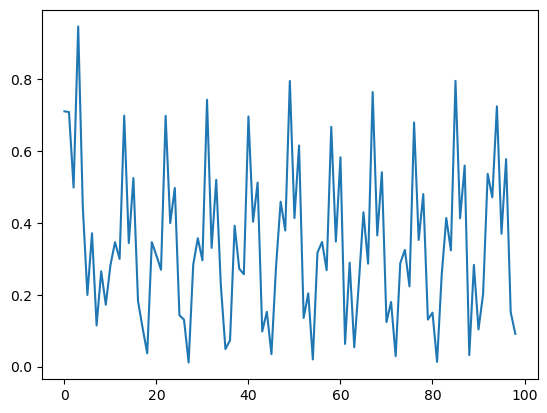

In [46]:
plt.plot(scores)

Very low peaks:
18       -       27 -       36 -        45 - 54       - 61      -   63     - 72       - 81       - 98
kurtosis - kurtosis - kurtosis -  kurtosis - kurtosis - range   - kurtosis - kurtosis - kurtosis - skew  

kurtosis seems to fit the data well

## SMD with fft approach

In [5]:
# Get data
real_data = pd.read_csv("data/real_data_fft_df")
fake_data = pd.read_csv("data/fake_data_fft_df")

In [8]:
real_data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,id
0,0.448546,0.237431,0.256718,0.135485,0.180365,0.413182,0.087432,0.082914,0
1,0.437671,0.254018,0.269324,0.329846,0.116605,0.292927,0.034177,0.044756,0
2,0.433051,0.338209,0.265813,0.340607,0.082055,0.221576,0.035151,0.028251,0
3,0.374062,0.392808,0.160973,0.286000,0.106821,0.243198,0.038614,0.028068,0
4,0.331369,0.300076,0.174759,0.237560,0.033574,0.094763,0.037896,0.036065,0


In [7]:
fake_data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,id
0,0.316915,0.282025,0.340919,0.282624,0.254819,0.269616,0.240021,0.322872,0
1,0.317367,0.282262,0.341005,0.282732,0.254939,0.269314,0.239384,0.322839,0
2,0.298199,0.278674,0.337856,0.275188,0.247438,0.265505,0.235552,0.315300,0
3,0.258609,0.266987,0.329120,0.258813,0.235330,0.257915,0.227795,0.296359,0
4,0.215713,0.258418,0.321204,0.242268,0.219651,0.253512,0.223713,0.280629,0


In [30]:
for i in range(8):
    fo = "f"+str(i+1)
    numerator = real_data[fo].mean() - fake_data[fo].mean()
    denominator = np.sqrt(((real_data[fo].var() + fake_data[fo].var())/2))
    #denominator = real_data[fo].std() + fake_data[fo].std()
    print("feature: {} has a smd score of: {}".format(fo,np.abs(numerator/denominator)))

feature: f1 has a smd score of: 0.9611521631506985
feature: f2 has a smd score of: 0.5875414238334604
feature: f3 has a smd score of: 0.8356577462733629
feature: f4 has a smd score of: 0.703611679101911
feature: f5 has a smd score of: 0.12426973528357747
feature: f6 has a smd score of: 0.5969911122720291
feature: f7 has a smd score of: 0.25506023251400306
feature: f8 has a smd score of: 0.2455797521468083
